<a href="https://colab.research.google.com/github/sureshk6026/Task-6-7-8/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [4]:
df = pd.read_csv("/content/car_data (1).csv")

In [5]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

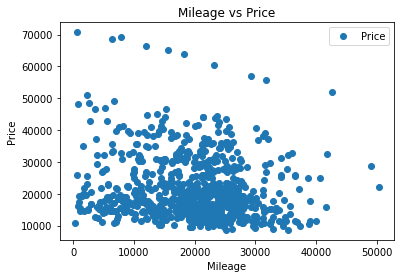

In [11]:
df.plot(x='Mileage',y='Price',style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [13]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [25]:
x=df.loc[:,['Mileage']].values
y=df.loc[:,['Price']].values

In [ ]:
x

In [26]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=10)

In [27]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [28]:
regressor.intercept_
regressor.coef_

array([[-0.15679917]])

In [29]:
y_pred = regressor.predict(x_test)

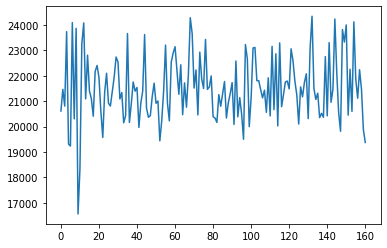

In [30]:
plt.plot(y_pred)
plt.show()

In [61]:
df1=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [62]:
df1

,Actual,Predicted
0,11045.108844,19860.650756
1,12045.920705,15106.338755
2,14703.136868,20963.008072
3,15053.933735,23283.569214
4,12553.071428,19472.203322
...,...,...
156,44084.914212,30599.262835
157,10106.016431,17862.392200
158,12828.030977,21332.866942
159,57154.443437,32805.426538


In [41]:
from sklearn import metrics
print('R2-SCORE',metrics.r2_score(y_test,y_pred))


R2-SCORE 0.02872584628111652


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'Mileage vs Price')

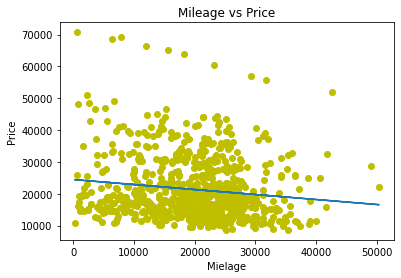

In [44]:
x=df[['Mileage']]
y=df.loc[:,'Price'].values
linreg=linear_model.LinearRegression()
linreg.fit(x,y)
plt.scatter(x,y,color='y')
plt.plot(x,regressor.predict(x))
plt.xlabel('Mielage')
plt.ylabel('Price')
plt.title('Mileage vs Price')


In [45]:
x=df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']].values
y=df['Price'].values

In [46]:
x


array([[8.2210e+03, 6.0000e+00, 3.1000e+00, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [9.1350e+03, 6.0000e+00, 3.1000e+00, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.3196e+04, 6.0000e+00, 3.1000e+00, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [2.0484e+04, 6.0000e+00, 3.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.5979e+04, 6.0000e+00, 3.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [3.5662e+04, 6.0000e+00, 3.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [ ]:
y

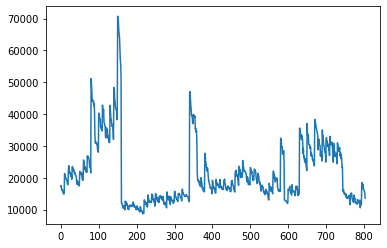

In [53]:
plt.plot(y)
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [56]:
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression()

In [59]:
coeff_df =pd.DataFrame(regressor.coef_,['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather'])
y_pred=regressor.predict(x_test)
coeff_df

,0
Mileage,-0.135193
Cylinder,3467.591623
Liter,-425.698169
Doors,-1402.487710
Cruise,6219.092563
Sound,-1819.145266
Leather,3399.941359


In [60]:
regressor.intercept_

5983.744090102266

In [63]:
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2

,Actual,Predicted
0,11045.108844,19860.650756
1,12045.920705,15106.338755
2,14703.136868,20963.008072
3,15053.933735,23283.569214
4,12553.071428,19472.203322
...,...,...
156,44084.914212,30599.262835
157,10106.016431,17862.392200
158,12828.030977,21332.866942
159,57154.443437,32805.426538


In [65]:
from sklearn import metrics
print('R2',metrics.r2_score(y_test,y_pred))

R2 0.4645408706309192


In [66]:
feature=['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']


In [67]:
def lin_reg_wrt_focus(feature, df3, focus='Price'):
  input_cols =df[feature]
  focus_output=df[focus]
  regr_sd=linear_model.LinearRegression()
  regr_sd.fit(input_cols,focus_output)
  return regr_sd.score(input_cols,focus_output)
  

In [68]:
import itertools as it

In [69]:
def get_combos(cols):
  return[it.combinations(cols,n+1) for n in range(len(cols))]

In [70]:
combos=get_combos(feature)


In [ ]:
def all_combo_scores(combo,df3,focus='Price'):
  combo_scores={}
  for m in range(len(list(combos))):
    for n in list(combos[m]):
      combo_scores[lin_reg_wrt_focus(list(n),df3,focus)]=n
  return combo_scores

In [ ]:
combo_scores =all_combo_scores(combos,df)
sorted(combo_scores.items(), key=lambda c:c[0],reverse=True)